In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sn
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score

In [3]:
data = pd.read_csv('project_train.csv')
data_evaluate = pd.read_csv('project_test.csv')

## multicollinearity assessment

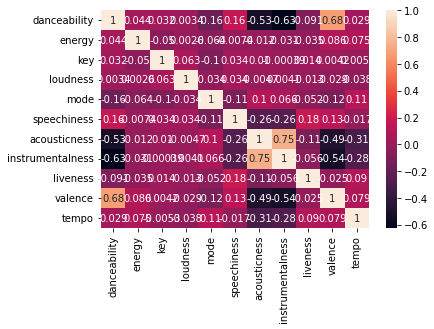

In [3]:
corrMatrix = pd.DataFrame(data, columns= ['danceability','energy','key','loudness','mode','speechiness','acousticness','instrumentalness','liveness','valence','tempo'
]).corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

## KNN

In [19]:
from sklearn.neighbors import KNeighborsClassifier
import warnings
from sklearn.preprocessing import MinMaxScaler

warnings.filterwarnings('ignore')

X = pd.DataFrame(data, columns= ['danceability','energy','key','loudness','mode','speechiness','acousticness','instrumentalness','liveness','valence','tempo'
])
Y = pd.DataFrame(data, columns= ['Label'])

scaler = MinMaxScaler()
X = scaler.fit_transform(X)


temp_list=[]
for n in range(2,31):
    knn = KNeighborsClassifier(n_neighbors=n)
    scores = cross_val_score(knn, X, Y, cv=10)
    print(n)
    print(scores)
    print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))
    temp_list.append(scores.mean())
    
print("maximum mean accuracy: %0.2f" % max(temp_list))
print("n = "+ str(temp_list.index(max(temp_list))+2))




2
[0.56862745 0.54901961 0.58823529 0.66666667 0.8627451  0.94
 0.94       0.84       0.84       0.66      ]
0.75 accuracy with a standard deviation of 0.15
3
[0.60784314 0.58823529 0.66666667 0.78431373 0.84313725 0.88
 0.92       0.82       0.84       0.66      ]
0.76 accuracy with a standard deviation of 0.11
4
[0.56862745 0.58823529 0.56862745 0.66666667 0.82352941 0.94
 0.94       0.86       0.84       0.7       ]
0.75 accuracy with a standard deviation of 0.14
5
[0.56862745 0.52941176 0.66666667 0.62745098 0.82352941 0.86
 0.88       0.82       0.9        0.68      ]
0.74 accuracy with a standard deviation of 0.13
6
[0.58823529 0.49019608 0.60784314 0.62745098 0.88235294 0.86
 0.92       0.84       0.84       0.64      ]
0.73 accuracy with a standard deviation of 0.15
7
[0.58823529 0.56862745 0.62745098 0.66666667 0.88235294 0.86
 0.92       0.82       0.94       0.64      ]
0.75 accuracy with a standard deviation of 0.14
8
[0.58823529 0.52941176 0.58823529 0.64705882 0.8627451  

## Random Forest

In [19]:
from sklearn.ensemble import RandomForestClassifier
import warnings

warnings.filterwarnings('ignore')

X = pd.DataFrame(data, columns= ['danceability','energy','key','loudness','mode','speechiness','acousticness','instrumentalness','liveness','valence','tempo'
])
Y = pd.DataFrame(data, columns= ['Label'])

temp_list=[]
temp_list_std=[]
for n in range(2,16):
    clf = RandomForestClassifier(max_depth=n, random_state=0)
    scores = cross_val_score(clf, X, Y, cv=10)
    print(n)
    print(scores)
    print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))
    temp_list.append(scores.mean())
    temp_list_std.append(scores.std())
    
print("maximum mean accuracy: %0.2f" % max(temp_list))
print("depth = " + str(temp_list.index(max(temp_list))+2))


2
[0.54901961 0.50980392 0.52941176 0.52941176 0.82352941 0.78
 0.76       0.88       0.7        0.76      ]
0.68 accuracy with a standard deviation of 0.13
3
[0.54901961 0.58823529 0.60784314 0.58823529 0.84313725 0.82
 0.78       0.88       0.92       0.76      ]
0.73 accuracy with a standard deviation of 0.13
4
[0.58823529 0.58823529 0.7254902  0.66666667 0.82352941 0.88
 0.82       0.92       0.94       0.8       ]
0.78 accuracy with a standard deviation of 0.12
5
[0.64705882 0.56862745 0.7254902  0.70588235 0.8627451  0.88
 0.8        0.94       0.94       0.76      ]
0.78 accuracy with a standard deviation of 0.12
6
[0.60784314 0.60784314 0.70588235 0.7254902  0.84313725 0.9
 0.84       0.94       0.92       0.78      ]
0.79 accuracy with a standard deviation of 0.12
7
[0.60784314 0.62745098 0.76470588 0.7254902  0.88235294 0.86
 0.88       0.96       0.92       0.74      ]
0.80 accuracy with a standard deviation of 0.12
8
[0.62745098 0.64705882 0.7254902  0.76470588 0.84313725 0

Text(0, 0.5, 'standard deviation of cross validation score')

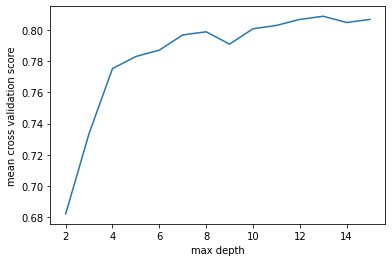

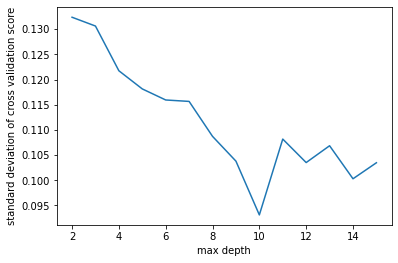

In [20]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(range(2,16),temp_list)
plt.xlabel('max depth')
plt.ylabel('mean cross validation score')
plt.figure()
plt.plot(range(2,16),temp_list_std)
plt.xlabel('max depth')
plt.ylabel('standard deviation of cross validation score')

## LDA

In [21]:
from sklearn.preprocessing import StandardScaler
X = pd.DataFrame(data, columns= ['danceability','energy','key','loudness','mode','speechiness','acousticness','instrumentalness','liveness','valence','tempo'
])
Y = pd.DataFrame(data, columns= ['Label'])

scaler = StandardScaler()
X = scaler.fit_transform(X)

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf = LinearDiscriminantAnalysis()
scores = cross_val_score(clf, X, Y, cv=10)

print(scores)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

[0.60784314 0.62745098 0.66666667 0.66666667 0.8627451  0.88
 0.78       0.86       0.9        0.58      ]
0.74 accuracy with a standard deviation of 0.12


## Predict on test data

In [21]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier

X = pd.DataFrame(data, columns= ['danceability','energy','key','loudness','mode','speechiness','acousticness','instrumentalness','liveness','valence','tempo'
])
Y = pd.DataFrame(data, columns= ['Label'])

X_eva = pd.DataFrame(data_evaluate, columns= ['danceability','energy','key','loudness','mode','speechiness','acousticness','instrumentalness','liveness','valence','tempo'
])

clf = RandomForestClassifier(max_depth=10, random_state=0)
clf.fit(X, Y)
y_pred = clf.predict(X_eva)
print(y_pred)

[0 0 1 0 1 1 0 1 1 1 0 0 1 0 0 1 1 0 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0
 1 0 1 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 1 1
 0]
